In [294]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

data = sio.loadmat('2-Class Problem.mat')
Training_class1 = np.array(data['Training_class1']) *0.001
Training_class2 = np.array(data['Training_class2']) * 0.001
Testing = np.array(data['Testing'])
Label_Testing = np.array(data['Label_Testing'])
d = Training_class1.shape[0]  #特征数量

In [295]:
Training_class1 = np.hstack((np.ones(Training_class1.shape[1]).reshape(-1,1),Training_class1.T))
Training_class2 = np.hstack((np.ones(Training_class2.shape[1]).reshape(-1,1),Training_class2.T))

In [296]:
a = np.zeros(Training_class1.shape[1]).reshape(1,-1)

In [297]:
print(a.shape,Training_class1.shape,Training_class2.shape)

(1, 191) (647, 191) (717, 191)


In [298]:
Training_data = np.vstack((Training_class1,Training_class2 * -1))

In [299]:
np.random.shuffle(Training_data)

In [300]:
b = []
for i in Training_data:
    if i[0] < 0:
        b.append(-10)
    else:
        b.append(10)
b = np.array(b)
print(b.reshape(1,-1))

[[ 10 -10  10 ... -10 -10 -10]]


In [301]:
alpha = 0.00005
def loss():
    mat = np.dot(Training_data,a.T) - b.reshape(-1,1)
    return np.dot(mat.T,mat).item()
print(a.shape)

(1, 191)


In [302]:
e_list = []
e = 51
e_current = loss()
e_past = 0
num = 0
while e >= 0.05:
    e_past = e_current
    num += 1
    for i in Training_data:
        copy = np.copy(i).reshape(-1,1)
        if np.dot(a,copy) <= 0:
            a = a - alpha * np.dot((np.dot(Training_data,a.T) - b.reshape(-1,1)).T,Training_data)
    e_current = loss()
    e = e_past - e_current
    print("第%d轮训练,error值为%.4f" %(num,e))
    print(loss())
    e_list.append(loss())

    
    

第1轮训练,error值为136350.0266
49.973406479171466
第2轮训练,error值为40.4720
9.50140701572105
第3轮训练,error值为1.7805
7.720929062164502
第4轮训练,error值为0.9291
6.791803521928246
第5轮训练,error值为0.6753
6.116498248595702
第6轮训练,error值为0.5312
5.585286802497348
第7轮训练,error值为0.4430
5.1423217759675
第8轮训练,error值为0.3847
4.757648271482204
第9轮训练,error值为0.3429
4.414782349068205
第10轮训练,error值为0.3105
4.104292716262612
第11轮训练,error值为0.2838
3.8204706024974837
第12轮训练,error值为0.2609
3.5595994354800853
第13轮训练,error值为0.2405
3.3190535823722316
第14轮训练,error值为0.2222
3.0968269103601638
第15轮训练,error值为0.2055
2.8912843408837694
第16轮训练,error值为0.1903
2.701029240696634
第17轮训练,error值为0.1762
2.5248311200870064
第18轮训练,error值为0.1632
2.361584851677276
第19轮训练,error值为0.1513
2.2102864770818873
第20轮训练,error值为0.1403
2.07001784626603
第21轮训练,error值为0.1301
1.9399360537838424
第22轮训练,error值为0.1207
1.8192655640456457
第23轮训练,error值为0.1120
1.7072919177596724
第24轮训练,error值为0.1039
1.6033564309174686
第25轮训练,error值为0.0965
1.5068515677966947
第26轮训练,error值为0.089

In [303]:
print(e_list)

[49.973406479171466, 9.50140701572105, 7.720929062164502, 6.791803521928246, 6.116498248595702, 5.585286802497348, 5.1423217759675, 4.757648271482204, 4.414782349068205, 4.104292716262612, 3.8204706024974837, 3.5595994354800853, 3.3190535823722316, 3.0968269103601638, 2.8912843408837694, 2.701029240696634, 2.5248311200870064, 2.361584851677276, 2.2102864770818873, 2.07001784626603, 1.9399360537838424, 1.8192655640456457, 1.7072919177596724, 1.6033564309174686, 1.5068515677966947, 1.4172168104342127, 1.3339349210310605, 1.2565285329966418, 1.1845570275059505, 1.1176136641804033, 1.0553229412934106, 0.9973381650753925, 0.9433392104596732, 0.8930304575989269, 0.8461388900260643]


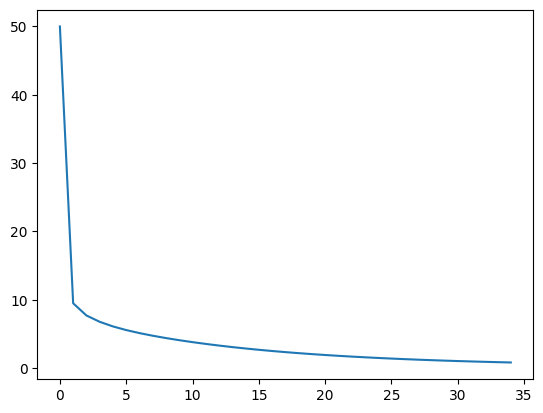

In [304]:
plt.plot(range(0,len(e_list)),e_list)